In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime

In [5]:
# get data from https://github.com/CSSEGISandData/COVID-19, provided by Johns Hopkins University

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## 1. Global Trends

### 1.1 Latest data update

The data is upated on a daily basis. Let's extract last update date of the data.

In [6]:
latest_date = datetime.datetime(int(confirmed.columns[-1].split("/")[2]),
                               int(confirmed.columns[-1].split("/")[0]),
                               int(confirmed.columns[-1].split("/")[1])).strftime("%B %d")

print("Data is as of", latest_date)

Data is as of April 08


### 1.2 Daily confirmed cases

One of the most important indicators about the outbreak is the trend of CONFIRMED cases. 

In [7]:
# get daily confirmed cases
confirmed_daily = confirmed.iloc[:, 4:].sum() 
confirmed_daily = pd.DataFrame({'date':confirmed_daily.index, 'confirmed_count':confirmed_daily.values})
confirmed_daily.date = pd.to_datetime(confirmed_daily.date)

# confirmed case counts higher than 99999
confirmed_daily[confirmed_daily.confirmed_count > 99999] 

,date,confirmed_count
44,2020-03-06,101801
45,2020-03-07,105847
46,2020-03-08,109821
47,2020-03-09,113590
48,2020-03-10,118620
49,2020-03-11,125875
50,2020-03-12,128352
51,2020-03-13,145205
52,2020-03-14,156101
53,2020-03-15,167454


From this data we can see that the number of confirmed cases increases exponentially. Below, I will further analyse exponential growth of the confirmed cases for selected countries. For now, let's see how long does it take to reach every 100000th confirmed case.

In [8]:
# time period for every 100000th confirmed case
print(confirmed_daily.date[44] - confirmed_daily.date[0], '    first 100000 cases')
print(confirmed_daily.date[56] - confirmed_daily.date[44], '   + 100000 cases')
print(confirmed_daily.date[59] - confirmed_daily.date[56], '    + 100000 cases')
print(confirmed_daily.date[62] - confirmed_daily.date[59], '    + 100000 cases')
print(confirmed_daily.date[64] - confirmed_daily.date[62], '    + 100000 cases')
print(confirmed_daily.date[66] - confirmed_daily.date[64], '    + 100000 cases')
print(confirmed_daily.date[67] - confirmed_daily.date[66], '    + 100000 cases')
print(confirmed_daily.date[69] - confirmed_daily.date[67], '    + 100000 cases')
print(confirmed_daily.date[70] - confirmed_daily.date[69], '    + 100000 cases')

44 days 00:00:00     first 100000 cases
12 days 00:00:00    + 100000 cases
3 days 00:00:00     + 100000 cases
3 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases


As see above there is a disappoing fact that the number of confirmed cases increase very fast - it takes shorter and shorter time period to reach every 100000th confirmed case. Let's see it visually.

C:\Users\Anar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737446., 737490., 737502., 737505., 737508., 737510., 737512.,
        737513.]), <a list of 8 Text xticklabel objects>)

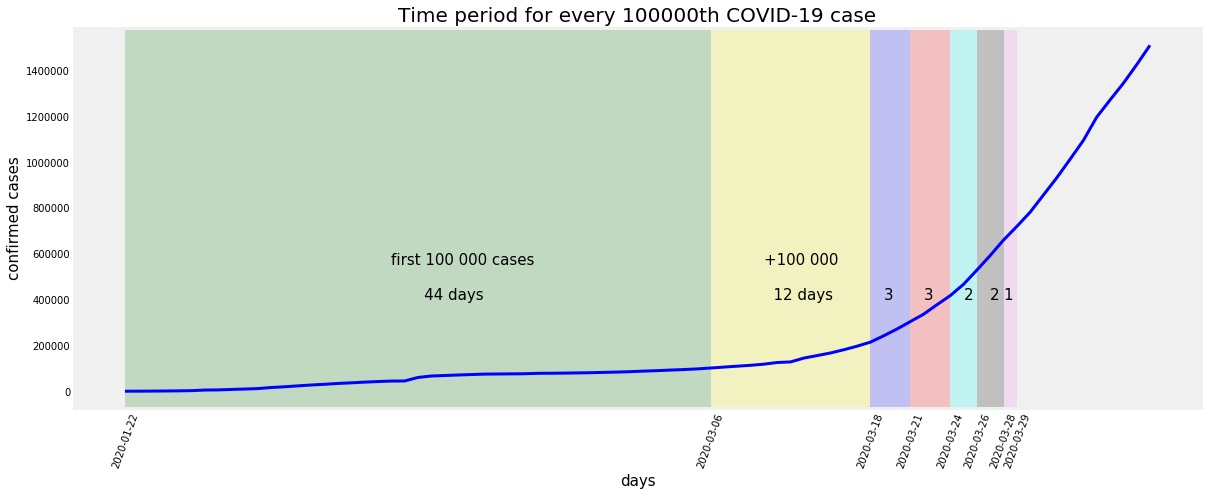

In [9]:
plt.figure(figsize=(18, 7))
plt.plot(confirmed_daily.date, confirmed_daily.confirmed_count, linewidth=3, color='b')
plt.title('Time period for every 100000th COVID-19 case', size=20)
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
# plt.gca().set_facecolor('w')
plt.grid(False)
plt.axvspan(confirmed_daily.date[0], confirmed_daily.date[44], facecolor='green', alpha=0.2)
plt.text(confirmed_daily.date[20], 400000, 'first 100 000 cases \n\n       44 days', size=15)
plt.axvspan(confirmed_daily.date[44], confirmed_daily.date[56], facecolor='yellow', alpha=0.2)
plt.text(confirmed_daily.date[48], 400000, '+100 000 \n\n  12 days', size=15)
plt.axvspan(confirmed_daily.date[56], confirmed_daily.date[59], facecolor='blue', alpha=0.2)
plt.text(confirmed_daily.date[57], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[59], confirmed_daily.date[62], facecolor='red', alpha=0.2)
plt.text(confirmed_daily.date[60], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[62], confirmed_daily.date[64], facecolor='cyan', alpha=0.2)
plt.text(confirmed_daily.date[63], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[64], confirmed_daily.date[66], facecolor='black', alpha=0.2)
plt.text(confirmed_daily.date[65], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[66], confirmed_daily.date[67], facecolor='violet', alpha=0.2)
plt.text(confirmed_daily.date[66], 400000, '1', size=15)
plt.xticks([confirmed_daily.date[0], confirmed_daily.date[44], confirmed_daily.date[56], confirmed_daily.date[59],
           confirmed_daily.date[62], confirmed_daily.date[64], confirmed_daily.date[66], confirmed_daily.date[67]])
plt.xticks(rotation=70)

There could be a number of reasons for such an extraordinary growth of confirmed cases. For example, an increasing number of tests conducted by countries. The higher the number of tests, the higher the number of positive cases.  

With this pace, we are going to reach the 1 000 000th confirmed case in the first week of April

### 1.3 Combining Confirmed, Deaths and Recoveries data

In [10]:
confirmed_latest = confirmed.iloc[:, [1,-1]].groupby('Country/Region').sum()
deaths_latest = deaths.iloc[:, [1,-1]].groupby('Country/Region').sum()
recoveries_latest = recoveries.iloc[:, [1,-1]].groupby('Country/Region').sum()

In [11]:
confirmed_latest

,4/8/20
Country/Region,
Afghanistan,444
Albania,400
Algeria,1572
Andorra,564
Angola,19
...,...
Vietnam,251
West Bank and Gaza,263
Western Sahara,4


In [12]:
# combine datasets and add Active count
full_df = pd.concat([confirmed_latest, deaths_latest, recoveries_latest], axis=1)
full_df.columns = ['confirmed', 'deaths', 'recoveries']
full_df['active'] = full_df.confirmed - full_df.deaths - full_df.recoveries
full_df.head(11)

,confirmed,deaths,recoveries,active
Country/Region,,,,
Afghanistan,444,14,29,401
Albania,400,22,154,224
Algeria,1572,205,237,1130
Andorra,564,23,52,489
Angola,19,2,2,15
Antigua and Barbuda,19,2,0,17
Argentina,1715,63,358,1294
Armenia,881,9,114,758
Australia,6010,50,1080,4880


Let's concentrate on top 15 countries.

### Here are top 15 countries with CONFIRMED cases

In [13]:
full_df.confirmed.sort_values(ascending=False).head(15)

Country/Region
US                429052
Spain             148220
Italy             139422
France            113959
Germany           113296
China              82809
Iran               64586
United Kingdom     61474
Turkey             38226
Belgium            23403
Switzerland        23280
Netherlands        20682
Canada             19141
Brazil             16170
Portugal           13141
Name: confirmed, dtype: int64

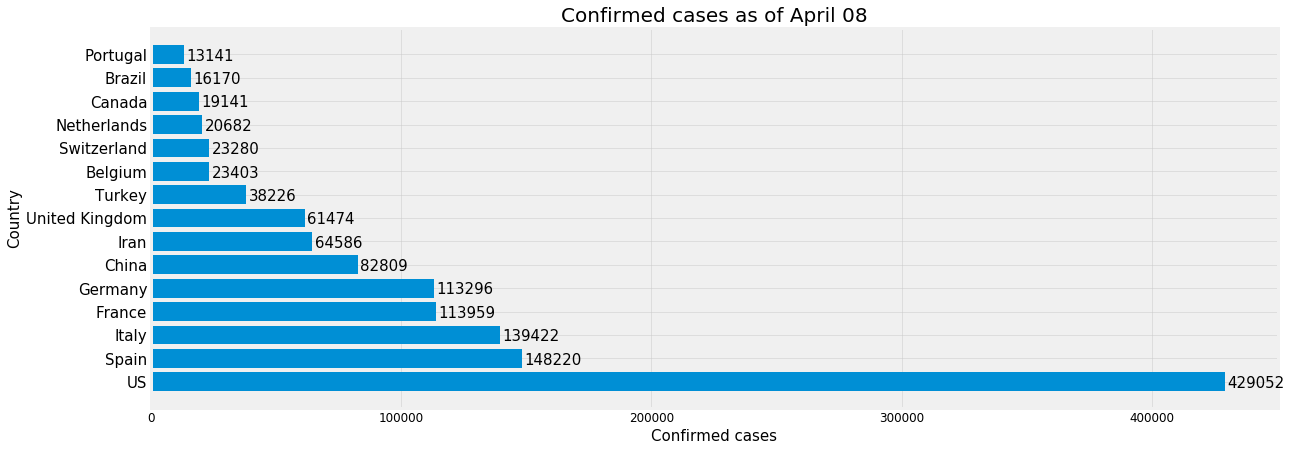

In [14]:
confirmed_top15 = full_df.confirmed.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(confirmed_top15.index, confirmed_top15)
plt.title('Confirmed cases as of ' + latest_date, size=20)
plt.xlabel('Confirmed cases', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(confirmed_top15):
    plt.text(value + 1000, index - .25, str(value), size=15)

US, Italy and Spain are leaders.

### ACTIVE cases

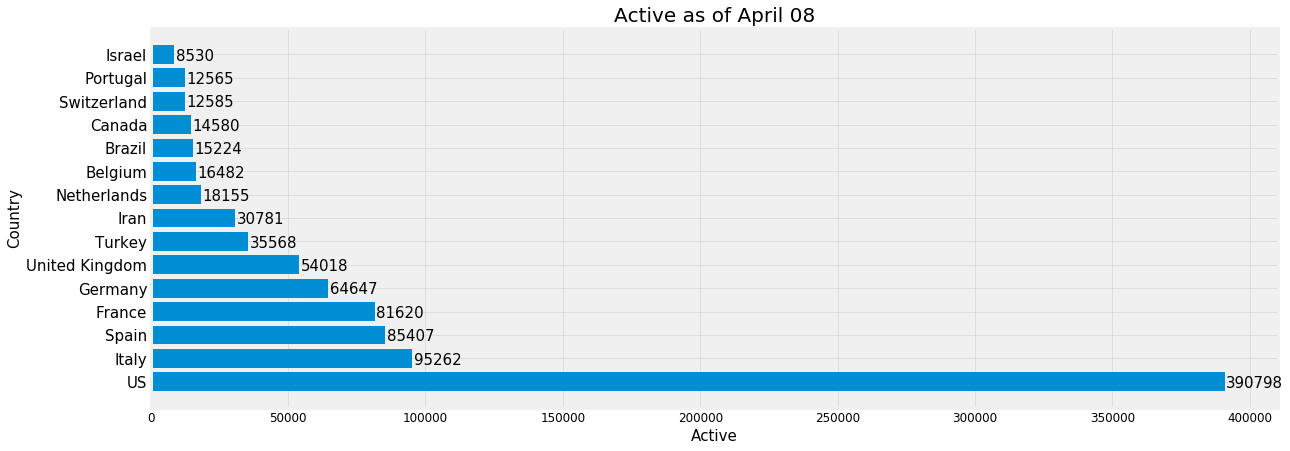

In [15]:
active_top15 = full_df.active.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(active_top15.index, active_top15)
plt.title('Active as of ' + latest_date, size=20)
plt.xlabel('Active', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(active_top15):
    plt.text(value + 500, index - .25, str(value), size=15)

Still US, Italy and Spain lead the countries with Active cases

### DEATHS

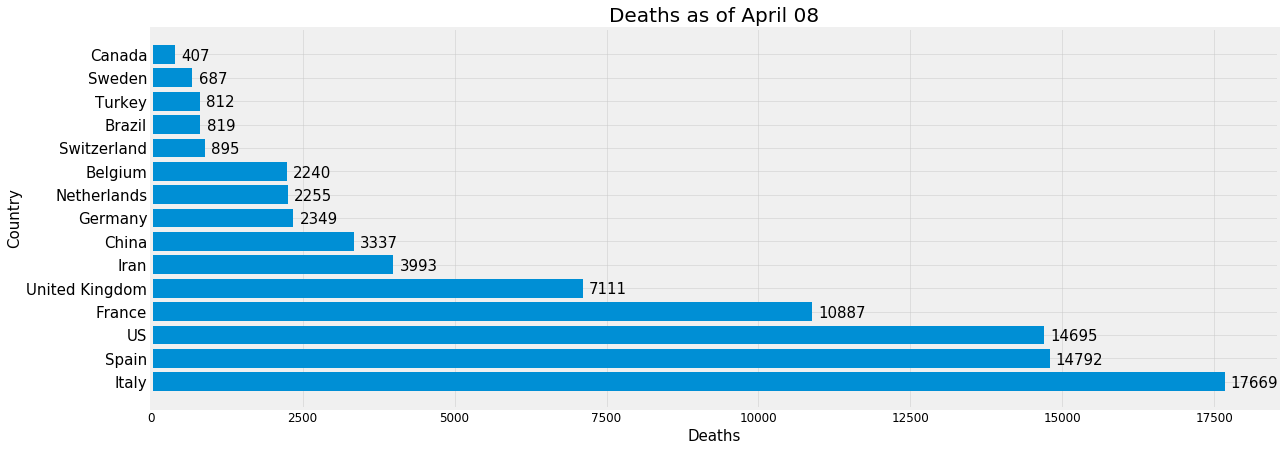

In [16]:
deaths_top15 = full_df.deaths.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(deaths_top15.index, deaths_top15)
plt.title('Deaths as of ' + latest_date, size=20)
plt.xlabel('Deaths', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(deaths_top15):
    plt.text(value + 100, index - .25, str(value), size=15)

Italy has the most number of deaths. One reason for this is the fact that Italy has one of the highly aged populations in the world and most victims of the COVID-19 are people aged over 65. 
In the coming days we can expect US reach Italy, since US has the most confimred cases so far.  

### RECOVERIES

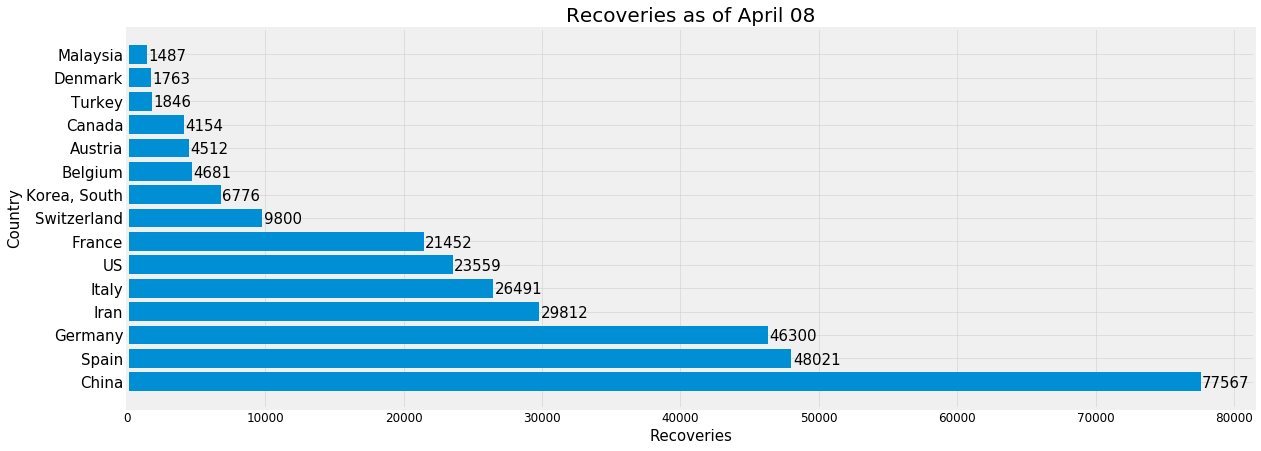

In [17]:
recoveries_top15 = full_df.recoveries.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(recoveries_top15.index, recoveries_top15)
plt.title('Recoveries as of ' + latest_date, size=20)
plt.xlabel('Recoveries', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(recoveries_top15):
    plt.text(value+100, index - .25, str(value), size=15)

China has the most number of revovered people, since it was the first country where virus started to spread and many people have already recovered from the disease. Perphaps this could also be related to the fact that China has realtively younger people (in contrast to Italy).

## 2. Country based analysis

As an itital step we need daily data for the selected countries. I will later select some of these countries for a more detailed analysis. 

In [18]:
confirmed_trend_top15 = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T

confirmed_trend_top15.index = pd.to_datetime(confirmed_trend_top15.index)

In [19]:
deaths_trend_top15 = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T
deaths_trend_top15.index = pd.to_datetime(deaths_trend_top15.index)

In [20]:
recoveries_trend_top15 = recoveries.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T
recoveries_trend_top15.index = pd.to_datetime(recoveries_trend_top15.index)

In [21]:
active_trend_top15 = confirmed_trend_top15 - deaths_trend_top15 - recoveries_trend_top15
active_trend_top15.head()

Country/Region,US,Spain,Italy,France,Germany,China,Iran,United Kingdom,Turkey,Belgium,Switzerland,Netherlands,Canada,Brazil,Portugal
2020-01-22,1,0,0,0,0,503,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,595,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,858,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,1325,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,1970,0,0,0,0,0,0,1,0,0


In [30]:
# create a function to plot daily trends

def plot_trend(df, country, color, title, interval, xlabel, ylabel):
    plt.figure(figsize=(18, 7))
    plt.plot(df[country].index, df[country], color, linestyle='--', linewidth=5)
    plt.title(title, size=25)
    plt.grid(alpha = 2)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel(xlabel, size=20)
    plt.ylabel(ylabel, size=20)

## Country - US

At COVID-19 GitHub data repository by John Hopkins University there is time series data about US confirmed and death cases.
Let's first check those data.

In [23]:
confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [24]:
# transform US confirmed and deaths data
confirmed_latest_US = confirmed_US.iloc[:, [6,-1]].groupby('Province_State').sum()
confirmed_latest_US.columns = ['confirmed']
confirmed_latest_US = confirmed_latest_US.sort_values('confirmed', ascending=False).head(10)

deaths_latest_US = deaths_US.iloc[:, [6,-1]].groupby('Province_State').sum()
deaths_latest_US.columns = ['deaths']
deaths_latest_US = deaths_latest_US.sort_values('deaths', ascending=False).head(10)

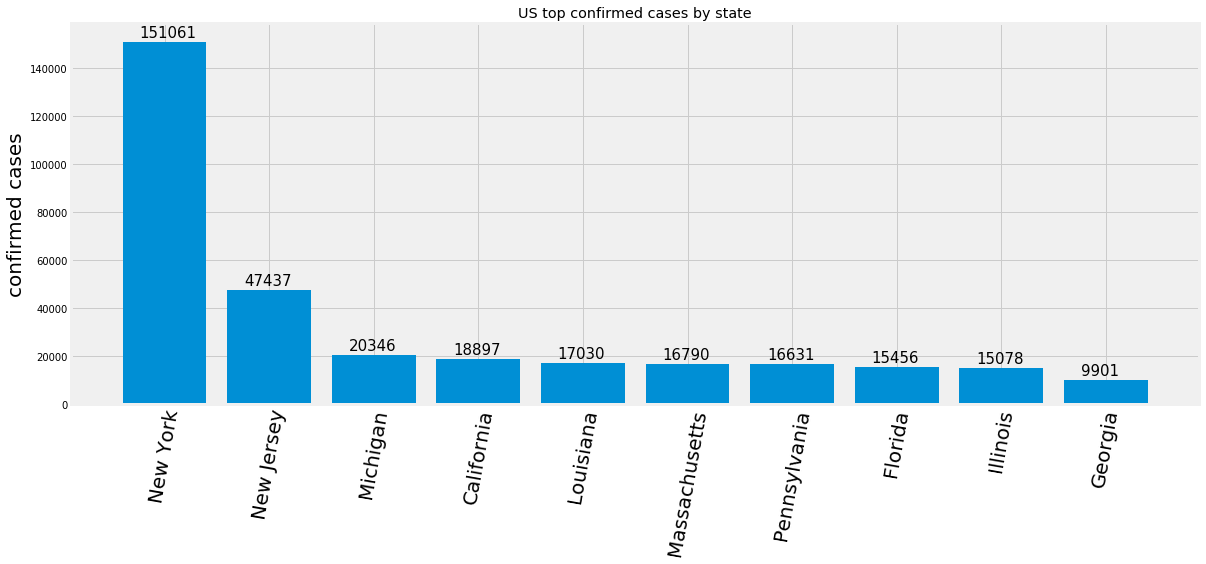

In [25]:
fig, ax = plt.subplots(figsize=(18, 7))
bar_US_cf = ax.bar(confirmed_latest_US.index, confirmed_latest_US.confirmed)
ax.set_xticklabels(confirmed_latest_US.index, rotation=80, size=20)
ax.set_ylabel('confirmed cases', size=20)
ax.set_title('US top confirmed cases by state')
for i in np.arange(len(confirmed_latest_US)):
    ax.annotate(bar_US_cf[i].get_height(),
    xy=(bar_US_cf[i].get_x() + bar_US_cf[i].get_width() / 5, bar_US_cf[i].get_height() + 2000),
    size=15)

The worst case is in New York. New York has times more confirmed cases compared to New Jersey - second state with the highest number fo cases.

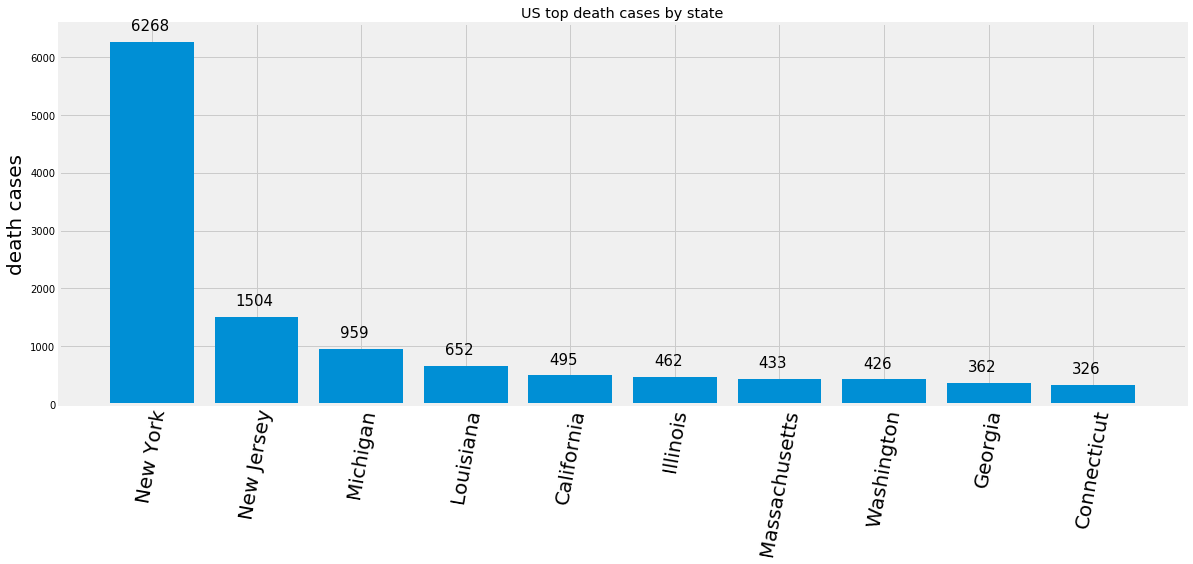

In [26]:
fig, ax = plt.subplots(figsize=(18, 7))
bar_US_de = ax.bar(deaths_latest_US.index, deaths_latest_US.deaths)
ax.set_xticklabels(deaths_latest_US.index, rotation=80, size=20)
ax.set_ylabel('death cases', size=20)
ax.set_title('US top death cases by state')
for i in np.arange(len(deaths_latest_US)):
    ax.annotate(bar_US_de[i].get_height(),
    xy=(bar_US_de[i].get_x() + bar_US_de[i].get_width() / 4, bar_US_de[i].get_height() + 200),
    size=15)

The most deaths is in New York, followed by New Jersey and Michigan.

### US Confirmed cases trend

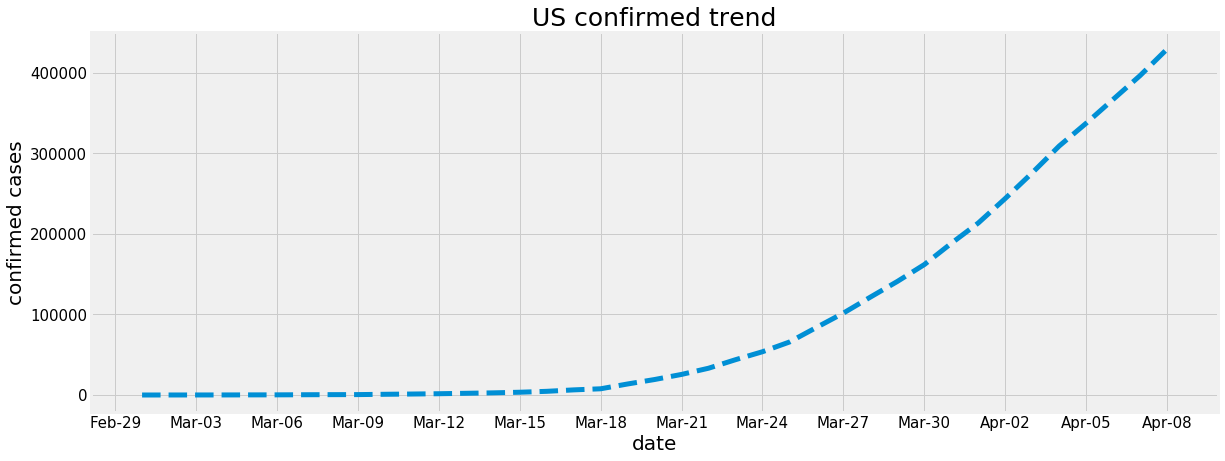

In [31]:
plot_trend(confirmed_trend_top15['2020-03-01':], 'US', 'C0', 'US confirmed trend', 3, 'date', 'confirmed cases')